#### Amy Green - 200930437 

# 5990M: Introduction to Programming for Geographical Information Analysis - Core Skills

## Assignment 2: Investigating the Black Death
-------------------------------------------------------------

### Project Aim

<p>The aim of the project hopes to build a model, based upon initial agent-based framework coding schemes, that generates an analysis into an aspect of 'The Black Death'. This project intends to calculate the fatalities from The Great Plague of London via the known population densities of London parishes in 1665. The generation of this measure from historical data will allow any correlation to be investigated and an overall map of total deaths to be produced. Furthermore, the final code should allow for manipulation in terms of changing parameter weights to investigate possible scenarios that could have ensued. </p>

### Context
<p>The Great Plague of London (1665-1666) was the last occurrence of the fatal ‘Black Death’ Plague that swept across Europe in the 1300s. The bubonic plague caused an epidemic across the 17th century parishes of London, as well as some smaller areas of the UK. The overcrowded city and hot Summer became a breeding ground for the bacterium <i>Yersinia pestis</i> disseminated by rat fleas – the known cause of the plague. Transmission was inevitable due to the high poverty levels, low sanitation rates, and open sewers in closely packed waste-filled streets; especially in poorer areas (Trueman, 2015). Deaths started slowly within the St. Giles’s Parish but rose alarmingly as documented by the weekly ‘Bill of Mortality’ that was legally required from each parish at the time (Defoe, 2005). The numbers of deaths slowed after 18 months due to quarantines, much of the population moving to the country and the onset of Winter, however, the final end emerged due to the Great Fire of London destroying central parts of the city in September 1666. </p>


### Data Source
<p>The calculation of the average death rate from the Great Plague will be generated from two raster maps. The model will be using known rat populations and average population densities of 16 different parishes within London, both from historical records, recorded by rat-catchers and parish figures in 1665, respectively. The original maps have data stored for each 400m x 400m area as text data, but the figures have been averaged to represent either the area covered by the Parish or the area within which the rat-catcher operates.
    
The relationship to calculate the average death rate from this source data is as follows: </p>

<p><b>Death Rate = (0.8 x Rat Population)(1.3 x Population Density) </b></p> 


### Model Expectations 

<p>The model should first show maps of the original source data: the rat populations and population densities for the 16 investigated parishes. These maps will then be combined using the calculation to generate the average death rate from the Great Plague per week and will be mapped as an image. The final map will then be altered so the user will be able to manipulate the weights of either the rat population or the density population to envision how these alternate factors may change the overall death rate. </p>
    
<p>The code should run on Windows.</p>


------------------------------------------------------------------------------
### Part 1 - Read in Source Data

In [36]:
'''Step 1 - Set up initial imports for programme'''
import random
%matplotlib inline 
import matplotlib.pyplot 
import matplotlib
import matplotlib.animation
import os
import requests
import tkinter
import pandas as pd #Shortened in standard python documentation format
import numpy as np #Shortened in standard python documentation format
import ipywidgets as widgets #Shortened in standard python documentation format


<p><u> Map 1</u> - Rat Populations (Average Rats caught per week) </p>

Text(0.5,1,'Average Rat Populations')

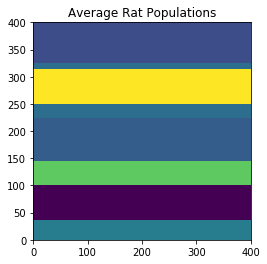

In [37]:
'''Step 2 - Import data for the rat populations and generate environment from the 2D array'''

#Set up a base path for the import of the rats txt file
base_path = "C:\\Users\\Home\\Documents\\MSc GIS\\Programming\\Black_Death\\BlackDeathProject" #Basepath
deathrats = "deathrats.txt" #Saved filename
path_to_file = os.path.join(base_path, deathrats)
f = open(path_to_file , 'r')
#mapA = f.read()
#print(mapA) #Test to show data has imported

#Set up an environment to read the rats txt file into - this is called environmentA
environmentA = []
for line in f:
    parsed_line = str.split(line, ",") #Split values up via commas
    rowlist = []
    for word in parsed_line:
        rowlist.append(float(word))
    environmentA.append(rowlist) #Append all lists individually so can print environment
f.close()
#print(environmentA) #Test environment appears and all lines run 

#Display environment of rat populations
matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(environmentA) #Shows the environment
matplotlib.pyplot.title('Average Rat Populations', loc='center') #Adds a centred title
#hsv()#Altered colourmap to red-yellow-green-cyan-blue-pink-magenta display, from original viridis: aids user interpretation


<p> This map contains the data for the average rat populations denoted from the amount of rats caught per week. The data is initially placed into a text file which can be seen through print(mapA), but then has been put into an environment which is shown. The different colours show the different amounts of rats, however, this will have more useful when combined with Map 2 in Part 2 when calculating the overall death rates. </p>

<p><u> Map 2</u> - Average Population Densities (per Parish) </p>

Text(0.5,1,'Average Parish Population Densities')

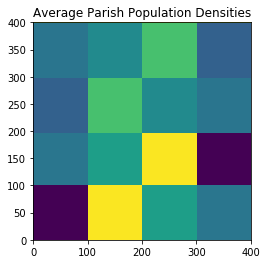

In [38]:
'''Step 3 - Import data for the parish population densities and generate environment from the 2D array'''

#Set up a base path for the import of the parish txt file
#base_path = "C:\\Users\\Home\\Documents\\MSc GIS\\Programming\\Black_Death\\BlackDeathProject" #Basepath
deathparishes = "deathparishes.txt" #Saved filename
path_to_file = os.path.join(base_path, deathparishes)
fd = open(path_to_file , 'r')
#mapB = fd.read()
#print(mapB) #Test to show data has imported

#Set up an environment to read the parish txt file into - this is called environmentB
environmentB = []
for line in fd:
    parsed_line = str.split(line, ",") #Split values up via commas
    rowlist = []
    for word in parsed_line:
        rowlist.append(float(word))
    environmentB.append(rowlist) #Append all lists individually so can print environment
f.close()
#print(environmentB) #Test environment appears and all lines run 

#Display environment of parish populations
matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(environmentB) #Shows the environment
matplotlib.pyplot.title('Average Parish Population Densities', loc='center') #Adds a centred title
#hsv() #Altered colourmap to red-yellow-green-cyan-blue-pink-magenta display, from original viridis

<p> This map contains the data for the average population densities per the 16 parishes investigated. The data is initially placed into a text file which can be seen through print(mapB), but then has been put into an environment which is shown. The different colours show the different populations per parish. </p>

------------------------------------------------------------------------------
### Part 2 - Calculate the Average Death Rate

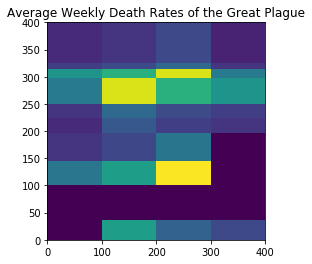

In [39]:
'''Step 4 - Calculate Map of Average death rates '''

#Sets up a list named results to append all calculated values to
result = []

for r in range(len(environmentA)):#Goes through both environments' (A and B) rows
    row_a = environmentA[r] 
    row_b = environmentB[r]
    rowlist = []
    result.append(rowlist) #Append all lists individually so can merge values from environmentA and environmentB
    for c in range(len(row_a)): #Goes through both environments' (A and B) columns 
        rats = row_a[c]        
        parishes = row_b[c]
        # d = (0.8 x r) x (1.3 x p) Equation used to generate average death rate 
        d = (0.8 * rats) * (1.3 * parishes) #Puts values through death average equation with initial set parameters
        rowlist.append(d)
        #print(d) #Test that results array shows     

'''Step 5 - Plot and show the average death rates'''

#Sets up environment to display the results
matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(result) #Shows the environment
matplotlib.pyplot.title('Average Weekly Death Rates of the Great Plague', loc='center') #Adds a centred title
#hsv() #Altered colourmap to red-yellow-green-cyan-blue-pink-magenta display, from original viridis


#To do: 
#Insert legend

'''Step 6 - Save the average death rate results as a seperate txt.file'''

np.savetxt('result.txt', result, fmt='%-6.2f' , newline="\r\n") #Each row should equal a new line on the map
#Results have been padded to a width of 6 and rounded to 2 decimal points within the txt.file


<p> The output map within Part 2 displays the average death rate calculations within the 400x400 environment of the parishes investigated. The results array has been saved as a <i> result.txt </i> file (rounded to two decimal points) that can be manipulated and utilised for further investigation. </p> 

------------------------------------------------------------------------------
### Part 3 - Display the Death Rate with Changing Parameters

In [40]:
'''Step 7 - Set up Rat Population Parameter Slider'''

#Generate a slider for the rats parameter
sR = widgets.FloatSlider(
    value=0.8, #Initial parameter value set by the equation
    min=0, #Minimum of range is 0
    max=5.0, #Maximum of range is 5
    step=0.1, #Values get to 1 decimal place increments
    description='Rats:', #Label for slider
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f', 
) 
display(sR) #Dispays the parameter slider for rats that users can alter

'''Step 8 - Set up Parish Population Density Parameter Slider'''

#Generate a slider for the parish parameter
sP = widgets.FloatSlider(
    value=1.3, #Initial parameter value set by the equation
    min=0, #Minimum of range is 0
    max=5.0, #Maximum of range is 5
    step=0.1, #Values get to 1 decimal place increments
    description='Parishes:', #Label for slider
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
) 
display(sP) #Displays the parameter slider for parish population that users can alter 

FloatSlider(value=0.8, continuous_update=False, description='Rats:', max=5.0, readout_format='.1f')

FloatSlider(value=1.3, continuous_update=False, description='Parishes:', max=5.0, readout_format='.1f')

<p> The sliders above are available to alter to investigate the relationship between the rat population values and the average population density amounts. These will then be the next set parameters when the proceeding cell is run. </p>

Changed Parameter Values
Rats: 0.8
Parishes: 1.3
Average weekly death rate at these parameters = 10670.4


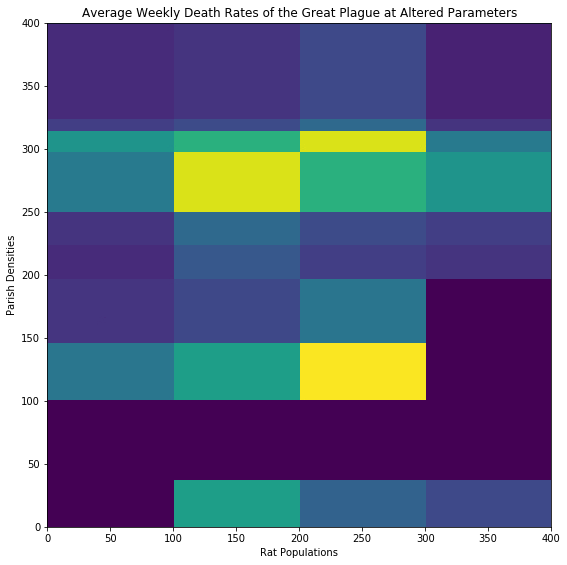

In [41]:
'''Step 9 - Display the Changed Parameters '''

#Formatting to display parameter amounts to correlate to the underlying map
print('Changed Parameter Values')
print('Rats:', sR.value) 
print('Parishes:', sP.value)


'''Step 10 - Create a map of the death rate average with new changed parameters'''

#Alter the results list to incorporate the altered parameter values
result = []

for r in range(len(environmentA)): #Goes through both environments' (A and B) rows
    row_a = environmentA[r]
    row_b = environmentB[r]
    rowlist = []
    result.append(rowlist) #Append all lists individually so can merge values from environmentA and environmentB
    for c in range(len(row_a)): #Goes through both environments' (A and B) columns
        rats = row_a[c]        
        parishes = row_b[c]
        # d = (0.8 x r) x (1.3 x p) #Original equation used to generate average death rate 
        d = (sR.value * rats) * (sP.value * parishes) #Updated equation to show the altered parameter values
        rowlist.append(d)
         #print(d) #Test that results array has updated
            
#Set up a larger figure view of the final map
fig = matplotlib.pyplot.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])

matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(result) #Display the final map
matplotlib.pyplot.xlabel('Rat Populations') #Label the x-axis
matplotlib.pyplot.ylabel('Parish Densities') #Label the y-axis
#matplotlib.pyplot.legend() #Test to see if legend is plausible
matplotlib.pyplot.title('Average Weekly Death Rates of the Great Plague at Altered Parameters', loc='center') #Adds a centred title
#hsv() #Altered colourmap to red-yellow-green-cyan-blue-pink-magenta display, from original viridis

#Saves the final death result as a .png file
matplotlib.pyplot.savefig('result.png', dpi=None, facecolor='w', edgecolor='w', #file name = result.png
        orientation='portrait')

def update(d):
    d = (sR * rats)*(sP * parishes)
    rowlist.append(d) #Updates figure with new parameters
    
print('Average weekly death rate at these parameters =', round(d,2)) #Print the average weekly death rate with altered parameters to 2 decimal places
    


The final map displays the average death rate of people within the 16 investigated parishes affected by the Great Plague of 1665. Changing the parameters will generate a different total value which will be interesting to explore. 

------------------------------------------------------------------------------
### Conclusions and Review
<p> The code appears to run smoothly and does generate an average weekly death rate successfully, even when parameter values have been changed. The issue that arises is that the final map doesn't change much, albeit small changes, if the parameters are altered. Therefore, to enhance the model further, the map display aspect would be explored to be show a clearer layout of the values, possinly by a line or correlation style graph. This would enable the relationship between the rat populations and the parish population densities to be interrogated further. </p>
 
<p><i>n.b.</i> The one issue with the model is that the base paths of the initial txt.file imports need to be altered if copying the code as they are read from a saved folder into the Jupyter notebook. This is simple to do, just a tad annoying! </p>

#### References
<ul type="circle">
<li><p> Defoe, D. 2005.<i> History of the Plague in London.</i> [Online]. USA: American Book Company. [Accessed 2/1/19] Available from: <a href="http://www.gutenberg.org/files/17221/17221-h/17221-h.htm".>http://www.gutenberg.org/files/17221/17221-h/17221-h.htm.</a> </p></li>
<li><p> Trueman, C.N. 2015.<i> The Plague of 1665. </i> [Online]. [Accessed 2/1/19]. Available from: <a href="https://www.historylearningsite.co.uk/stuart-england/the-plagu,/ae-of-1665/".> https://www.historylearningsite.co.uk/stuart-england/the-plague-of-1665/.</a> </p> </li>
<li><p> Wikipedia. 2018. <i> Great Plague of London. </i> [Online]. [Accessed 2/1/19]. Available from: <a href="https://en.wikipedia.org/wiki/Great_Plague_of_London.">https://en.wikipedia.org/wiki/Great_Plague_of_London.</a></p></li>
</ul>
